In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



referendum = pd.read_csv('data/referendum.csv', sep=';')
regions = pd.read_csv('data/regions.csv')
departments = pd.read_csv('data/departments.csv')


In [42]:
regions = regions.drop(columns=['slug','id'])
departments = departments.drop(columns=['slug','id'])
regions = regions.rename(columns={'code': 'code_reg', 'name': 'name_reg'})
departments = departments.rename(columns={'code': 'code_dep', 'name': 'name_dep', 'region_code': 'code_reg'})
df = pd.merge(regions, departments, on='code_reg')

In [43]:
regions_and_departments = df
regions_and_departments.shape

(109, 4)

In [44]:
regions_and_departments = regions_and_departments[regions_and_departments['code_reg']!='COM']
regions_and_departments

,code_reg,name_reg,code_dep,name_dep
0,01,Guadeloupe,971,Guadeloupe
1,02,Martinique,972,Martinique
2,03,Guyane,973,Guyane
3,04,La Réunion,974,La Réunion
4,06,Mayotte,976,Mayotte
...,...,...,...,...
96,93,Provence-Alpes-Côte d'Azur,13,Bouches-du-Rhône
97,93,Provence-Alpes-Côte d'Azur,83,Var
98,93,Provence-Alpes-Côte d'Azur,84,Vaucluse
99,94,Corse,2A,Corse-du-Sud


In [45]:

# ajouter les 0 pour les chiffres

referendum["Department code"].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD',
       'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ'], dtype=object)

In [46]:
regions_and_departments = regions_and_departments[regions_and_departments['code_dep']!='COM']
referendum[(referendum["Department name"] != "FRANCAIS DE L'ETRANGER")]
df1 = pd.merge(referendum, regions_and_departments, left_on='Department code', right_on='code_dep')

In [47]:
df1

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,code_reg,name_reg,code_dep,name_dep
0,10,AUBE,2,Ailleville,207,36,1,71,99,44,Grand Est,10,Aube
1,10,AUBE,3,Aix-en-Othe,1768,286,30,578,874,44,Grand Est,10,Aube
2,10,AUBE,4,Allibaudières,187,60,3,31,93,44,Grand Est,10,Aube
3,10,AUBE,5,Amance,223,39,4,39,141,44,Grand Est,10,Aube
4,10,AUBE,6,Arcis-sur-Aube,1887,385,29,500,973,44,Grand Est,10,Aube
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33331,95,VAL D'OISE,676,Villers-en-Arthies,382,64,5,87,226,11,Île-de-France,95,Val-d'Oise
33332,95,VAL D'OISE,678,Villiers-Adam,595,71,4,191,329,11,Île-de-France,95,Val-d'Oise
33333,95,VAL D'OISE,680,Villiers-le-Bel,13269,4083,224,5546,3416,11,Île-de-France,95,Val-d'Oise
33334,95,VAL D'OISE,682,Villiers-le-Sec,95,11,0,40,44,11,Île-de-France,95,Val-d'Oise


In [52]:
referendum_and_areas = df1


,Town code,Registered,Abstentions,Null,Choice A,Choice B
name_reg,,,,,,
Auvergne-Rhône-Alpes,599591,4334439,759462,66232,1489049,2019696
Bourgogne-Franche-Comté,1095634,1997925,358321,33671,668246,937687
Bretagne,214573,2380594,364724,36077,944052,1035741
Centre-Val de Loire,299535,1801366,326560,28827,590890,855089
Corse,66034,220349,56696,2921,60917,99815
Grand Est,1384801,3660510,742840,54471,1024949,1838250
Hauts-de-France,1192493,3834376,793627,55405,1290341,1695003
Normandie,1115294,2372779,426075,35513,816972,1094219
Nouvelle-Aquitaine,968048,4201774,711017,71629,1641249,1777879


In [53]:

referendum_and_areas = referendum_and_areas.drop(columns=['Town code'])

referendum_and_areas = referendum_and_areas.groupby('name_reg').sum()


In [56]:
referendum_and_areas.reset_index(inplace=True) # reset index
referendum_and_areas

,name_reg,Registered,Abstentions,Null,Choice A,Choice B
0,Auvergne-Rhône-Alpes,4334439,759462,66232,1489049,2019696
1,Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687
2,Bretagne,2380594,364724,36077,944052,1035741
3,Centre-Val de Loire,1801366,326560,28827,590890,855089
4,Corse,220349,56696,2921,60917,99815
5,Grand Est,3660510,742840,54471,1024949,1838250
6,Hauts-de-France,3834376,793627,55405,1290341,1695003
7,Normandie,2372779,426075,35513,816972,1094219
8,Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879
9,Occitanie,3892146,642412,60912,1475114,1713708


In [61]:
geo_data

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ..."
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ..."
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."
5,44,Grand Est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46..."
7,53,Bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45..."
9,01,Guadeloupe,"MULTIPOLYGON (((-61.63356 15.83977, -61.64798 ..."


,code,nom,geometry,name_reg,Registered,Abstentions,Null,Choice A,Choice B,ratio
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",Normandie,2372779,426075,35513,816972,1094219,0.427467


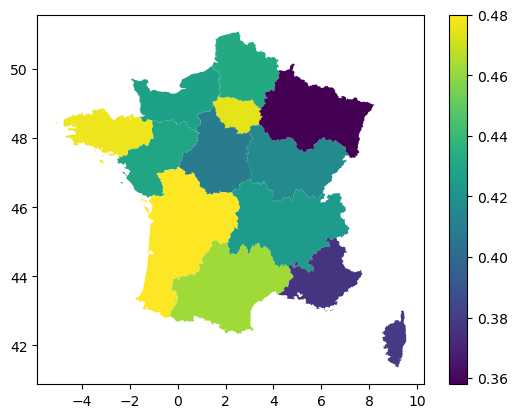

In [72]:

geo_data = gpd.read_file('data/regions.geojson')
merged = geo_data.merge(referendum_and_areas, left_on='nom', right_on='name_reg')

merged['ratio'] = merged['Choice A'] / (merged['Choice B']+merged['Choice A'])
    # Plot the map
merged.plot(column='ratio', legend=True)

merged[merged["nom"] == "Normandie"]
